In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
s=32
trainGen=ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [4]:
train_set=trainGen.flow_from_directory('Nnn/Train',target_size=(s,s),color_mode='grayscale',batch_size=32, class_mode='categorical')

val_set=trainGen.flow_from_directory('Nnn/Train',target_size=(s,s),color_mode='grayscale',batch_size=32, class_mode='categorical',subset="validation")

test_set=trainGen.flow_from_directory('Nnn/Test',target_size=(s,s),color_mode='grayscale',batch_size=32, class_mode='categorical')

Found 78200 images belonging to 46 classes.
Found 7820 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras import optimizers

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(s,s,1),padding='same',activation='relu'))
model.add(Conv2D(32, 3, 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),input_shape=(s,s,1),padding='same',activation='relu'))
model.add(Conv2D(64, 3, 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0

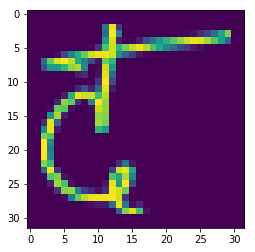

In [7]:
for i in range(5):
    plt.imshow(train_set[0][0][i].reshape(32,32))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [9]:
model.fit_generator(train_set,steps_per_epoch=70380,epochs=5, validation_data=val_set, validation_steps=7820)

Epoch 1/5
   34/70380 [..............................] - ETA: 8:31:05 - loss: 3.8286 - acc: 0.0248

KeyboardInterrupt: 